# Classificazione con algoritmi della libreria sklearn

### 0) Importo le librerie necessarie

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1) Carico e preparo i dati

In [73]:
# Carico il dataset
path = '../color_extr/data.csv'
data = pd.read_csv(path, usecols = [i for i in range(5)])

# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[['presenza_foglie','assenza_foglie','presenza_bachi_sfondo','assenza_bachi_sfondo']], data[['classificazione']], test_size=0.23)

# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 3) Sklearn Logistic Regression

In [74]:
# Alleno il modello e ottengo le predizioni
model_lr = LogisticRegression()
lr = model_lr.fit(X_train, Y_train)
predictions_lr = model_lr.predict(X_test)
predictions_lr_scores = model_lr.predict_proba(X_test)[:,1]

# Controllo accuratezza risultati
train_score = model_lr.score(X_train, Y_train)
test_score = model_lr.score(X_test, Y_test)
print("### LOGISTIC:\n\tAccuracy of training: "+str(train_score)+"\n\tAccuracy of test: "+str(test_score))

### LOGISTIC:
	Accuracy of training: 0.9875
	Accuracy of test: 0.9903536977491961


#### - Metrica errore

In [75]:
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.44041450777202074, 0.5595854922279793)

#### - Confusion Matrix

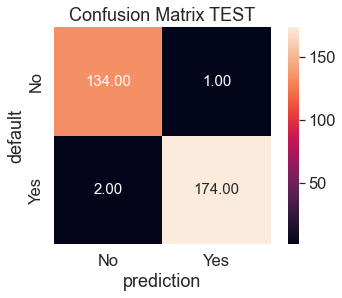

In [76]:
cm = confusion_matrix(Y_test, predictions_lr)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision Recall Curve

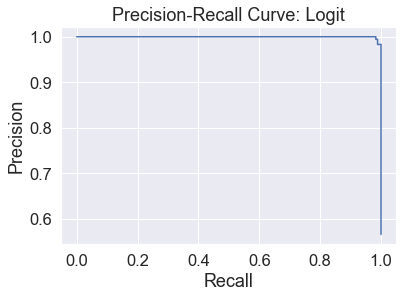

Precision:  0.567741935483871
Recall:  1.0
f1-score:  0.9914529914529915


In [77]:
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_lr_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions_lr))

#### - ROC e AUC curve

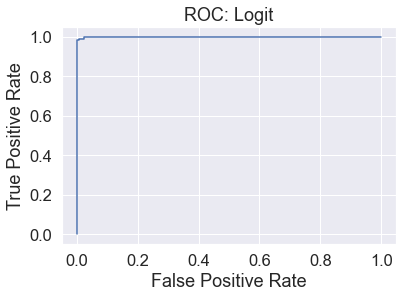

AUC:  0.9906144781144782


In [78]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions_lr_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions_lr))

#### - Learning curves

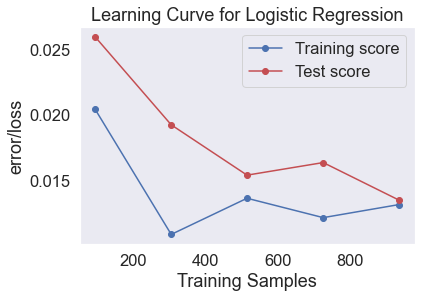

In [79]:
import warnings
warnings.filterwarnings('ignore')

train_size, train_score, test_score = learning_curve(estimator=model_lr, X=X_train, y=Y_train, cv=10, scoring = None )

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()

### 4) SVM

In [80]:
# Alleno il modello e ottengo le predizioni
clf = svm.SVC(kernel='linear', probability=True) 
svmm = clf.fit(X_train, Y_train)
predictions_svmm = clf.predict(X_test)
predictions_svmm_scores = clf.predict_proba(X_test)[:,1]

# Controllo accuratezza risultati
train_score = svmm.score(X_train, Y_train)
test_score = svmm.score(X_test, Y_test)
print("### SVM:\n\tAccuracy of training: "+str(train_score)+"\n\tAccuracy of test: "+str(test_score))

### SVM:
	Accuracy of training: 0.9865384615384616
	Accuracy of test: 0.9903536977491961


#### - Metrica errore

In [81]:
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.44041450777202074, 0.5595854922279793)

#### - Confusion Matrix

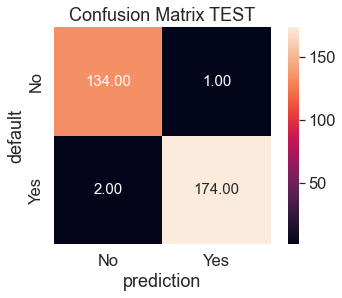

In [82]:
cm = confusion_matrix(Y_test, predictions_svmm)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision Recall Curve

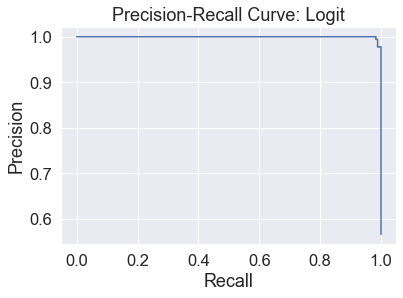

Precision:  0.7242798353909465
Recall:  1.0
f1-score:  0.9914529914529915


In [83]:
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_svmm_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions_svmm))

#### - ROC e AUC curve

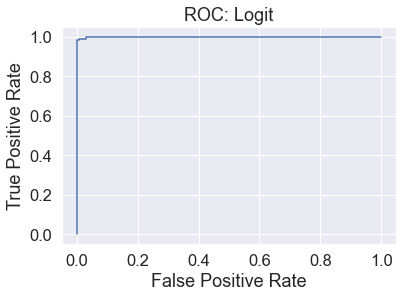

AUC:  0.9906144781144782


In [84]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions_svmm_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions_svmm))

#### - Learning curves

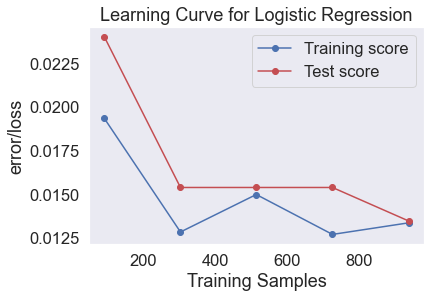

In [85]:
train_size, train_score, test_score = learning_curve(estimator=svmm, X=X_train, y=Y_train, cv=10, scoring = None )

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()

### 5) K-nearest neighbour

In [86]:
# Alleno il modello e ottengo le predizioni
model_knn = classifier = KNeighborsClassifier(n_neighbors=3)
knn = model_knn.fit(X_train, Y_train)
predictions_knn = model_knn.predict(X_test)
predictions_knn_scores = model_knn.predict_proba(X_test)[:,1]

# Controllo accuratezza risultati
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("### KNN:\n\tAccuracy of training: "+str(train_score)+"\n\tAccuracy of test: "+str(test_score))

### KNN:
	Accuracy of training: 0.9980769230769231
	Accuracy of test: 0.9871382636655949


#### - Metrica errrore

In [87]:
metric_error = len(data[data.classificazione == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.44041450777202074, 0.5595854922279793)

#### - Confusion Matrix

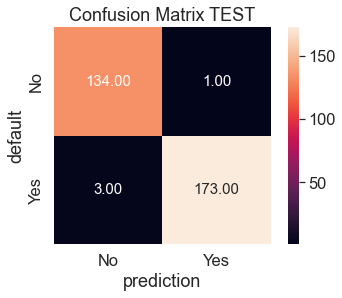

In [88]:
cm = confusion_matrix(Y_test, predictions_knn)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision Recall Curve

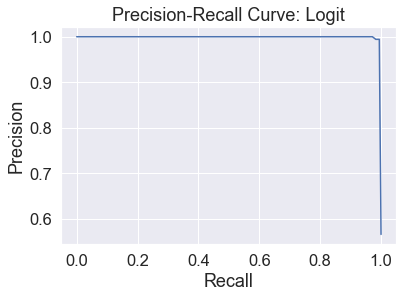

Precision:  0.9943181818181818
Recall:  0.9943181818181818
f1-score:  0.9885714285714285


In [89]:
precision, recall, thresholds = precision_recall_curve(Y_test, predictions_knn_scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions_knn))

#### - ROC e AUC curve

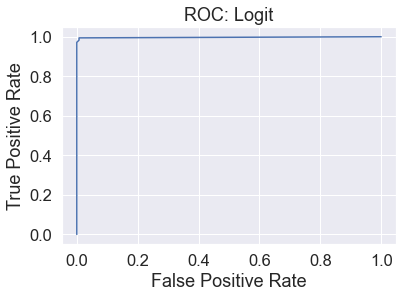

AUC:  0.9877735690235689


In [90]:
fpr, tpr, thresholds = roc_curve(Y_test, predictions_knn_scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions_knn))

#### - Learning curves

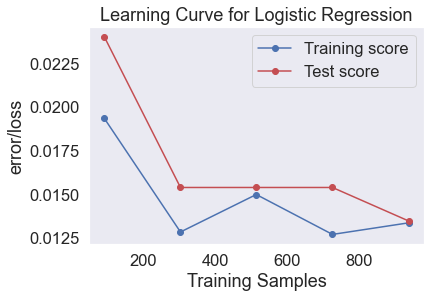

In [91]:
train_size, train_score, test_score = learning_curve(estimator=svmm, X=X_train, y=Y_train, cv=10, scoring = None )

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()